| 목차(Context)

- 문제상황 및 데이터 살펴보기
- 문제해결 프로세스 정의
- Data 전처리 및 EDA
- 캐릭터 특성 파악하기
- 이상 탐지 모델링

In [1]:
import warnings
warnings.filterwarnings('ignore')

## 문제상황 및 데이터 살펴보기

| 시나리오

해당 게임은 팀배틀 AOS 게임이다. 10명의 플레이어가 두 팀으로 나뉘어 각자의 캐릭터를 골라 조종하고 골 포인터 득점의 총합으로 승부를 가리는 규칙이다. 각 캐릭터는 특성에 따라 스테이터스를 보유하고 있다. 이 스테이터스의 밸런스가 적절해야 게임 전체에 대한 플레이 밸런스가 유지되기 떄문에 매우 중요한 영역이라고 할 수 있다. 현재 운영되고 있는 게임 캐릭터를 대상으로 밸런스가 양호한지 검토해보자

| 데이터 살펴보기
- 게임 캐릭터 스테이터스 정보
- 데이터 명세↓
|Column|Description|
|:---|:---|
|Name|캐릭터명|
|Description |설명|
|Role |역할|
|Ranged_or_Melee |근접/원거리 유형|
|UsageDifficulty |유저 난이도|
|Offense |공격력|
|Endurance |지구력|
|Mobility |이동력|
|Scoring |득점력|
|Support |지원력|

In [3]:
# pd.set_option
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Data read
df = pd.read_csv("D:\\csv\\chapter07_df.csv")
df.head()

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
0,Zoroark,Confound the competition with Zoroark’s speed ...,Speedster,Melee,Expert,3.5,1.5,4.0,2.0,0.5
1,Scizor,Test your mettle with this Melee All-Rounder c...,All-Rounder,Melee,Intermediate,4.5,2.5,4.5,2.5,1.0
2,Glaceon,Take the Glacial Stage with this sleet-footed ...,Attacker,Ranged,Intermediate,4.0,2.0,3.0,1.0,0.5
3,Tyranitar,Go on a rampage with this tyrannical Melee All...,All-Rounder,Melee,Intermediate,4.0,4.0,2.0,1.5,1.0
4,Dodrio,Prove that three heads are better than one wit...,Speedster,Melee,Expert,3.0,2.0,4.0,4.0,0.5


## 문제해결 프로세스 정의

| 문제정의

- 캐릭터 밸런스 이상으로 게임 퀄리티 저하
- 신규 진입 유저 감소, 기존 유저 이탈 증가

| 기대효과 (문제를 해결했을 때 어떤 효과를 얻을 수 있는가)

- 캐릭터 스테이터스 조정을 통해 게임 밸런스 조정
- 신규 진입 유저 증가, 기존 유저 이탈 방지

| 해결방안

- 스테이터스 이상 캐릭터 탐지, 밸런스 조정을 통해 게임 정상화
- Data 전처리 및 EDA
- 캐릭터 특성 및 스테이터스 탐색하기
- 이상 탐지 모델링 수행

| 성과측정 (KPI, asis-tobe)

- 밸런스 조정 후 신규 유저 진입률 비교
- 밸런스 조정 후 기존 고객 이탈률 비교

| 현업적용

- 밸런스 이상 캐릭터 검출 후 밸런스 조정 검토
- 밸런스 조정 후 게임 업데이트 반영

| 주요 코드 미리 살펴보기

sns.histplot()

sns.distplot(), enumerate(), plt.subplots(), spider chart

.reset_index(), .sort_values(['Role', 'all_stat'], ascending=[True, False])

## Data 전처리 및 EDA

In [4]:
# Data 전처리
# 수집된 데이터의 기본 정보들을 확인

# 1. Data shape 확인
# 2. Data type 확인
# 3. Null값 확인
# 4. Outlier 확인

In [5]:
# Data shape
print('df :', df.shape)        # 44 row, 10 col

df : (44, 10)


In [6]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             44 non-null     object 
 1   Description      44 non-null     object 
 2   Role             44 non-null     object 
 3   Ranged_or_Melee  44 non-null     object 
 4   UsageDifficulty  44 non-null     object 
 5   Offense          44 non-null     float64
 6   Endurance        44 non-null     float64
 7   Mobility         44 non-null     float64
 8   Scoring          44 non-null     float64
 9   Support          44 non-null     float64
dtypes: float64(5), object(5)
memory usage: 3.6+ KB


In [7]:
# Null 값 확인
print(df.isnull().sum())

Name               0
Description        0
Role               0
Ranged_or_Melee    0
UsageDifficulty    0
Offense            0
Endurance          0
Mobility           0
Scoring            0
Support            0
dtype: int64


In [8]:
# Outlier 확인 (수치형)
df.describe()

,Offense,Endurance,Mobility,Scoring,Support
count,44.000000,44.000000,44.000000,44.000000,44.000000
mean,3.204545,2.545455,2.602273,2.306818,1.784091
std,1.030456,0.951243,0.955885,0.700630,1.432179
min,1.000000,1.500000,1.000000,1.000000,0.500000
25%,2.500000,1.875000,2.000000,1.875000,0.500000
50%,3.500000,2.250000,2.500000,2.500000,1.000000
75%,4.000000,3.125000,3.000000,2.625000,3.000000
max,4.500000,5.000000,5.000000,4.000000,4.500000


## 데이터 EDA

데이터 특성 파악을 위한 초기 탐색

In [9]:
df.head()

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
0,Zoroark,Confound the competition with Zoroark’s speed ...,Speedster,Melee,Expert,3.5,1.5,4.0,2.0,0.5
1,Scizor,Test your mettle with this Melee All-Rounder c...,All-Rounder,Melee,Intermediate,4.5,2.5,4.5,2.5,1.0
2,Glaceon,Take the Glacial Stage with this sleet-footed ...,Attacker,Ranged,Intermediate,4.0,2.0,3.0,1.0,0.5
3,Tyranitar,Go on a rampage with this tyrannical Melee All...,All-Rounder,Melee,Intermediate,4.0,4.0,2.0,1.5,1.0
4,Dodrio,Prove that three heads are better than one wit...,Speedster,Melee,Expert,3.0,2.0,4.0,4.0,0.5


In [10]:
# 총 캐릭터 수 (중복캐릭 없음)
df['Name'].value_counts()

Zoroark             1
Scizor              1
Cramorant           1
Mr. Mime            1
Venusaur            1
Lucario             1
Talonflame          1
Crustle             1
Snorlax             1
Charizard           1
Eldegoss            1
Greninja            1
Pikachu             1
Zeraora             1
Gardevoir           1
Blissey             1
Blastoise           1
Sylveon             1
Mamoswine           1
Greedent            1
Aegislash           1
Slowbro             1
Absol               1
Machamp             1
Hoopa               1
Glaceon             1
Tyranitar           1
Dodrio              1
Delphox             1
Clefable            1
Espeon              1
Buzzwole            1
Mew                 1
Duraludon           1
Wigglytuff          1
Azumarill           1
Tsareena            1
Dragonite           1
Trevenant           1
Alolan Ninetales    1
Cinderace           1
Garchomp            1
Gengar              1
Decidueye           1
Name: Name, dtype: int64

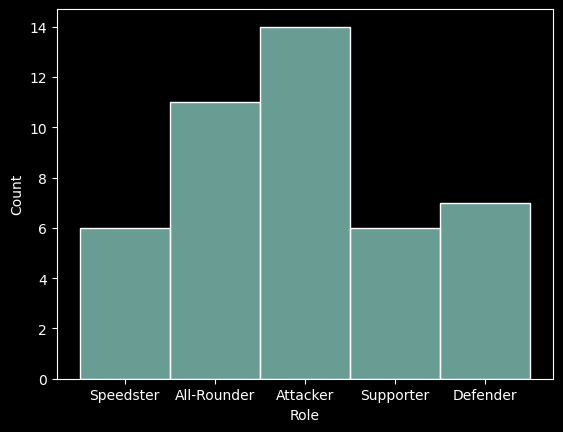

In [13]:
# 캐릭터 역할
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use(['dark_background'])

sns.histplot(data=df['Role'], kde=False);

<AxesSubplot:xlabel='Ranged_or_Melee', ylabel='Count'>

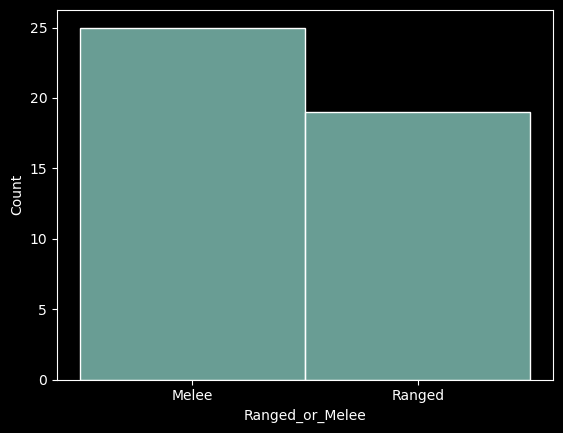

In [14]:
# 캐릭터 공격 Type (Melle : 근접, Ranged : 원거리)
sns.histplot(data=df['Ranged_or_Melee'], kde=False)

In [15]:
df['UsageDifficulty'].value_counts()

Intermediate    18
Novice          14
Expert          12
Name: UsageDifficulty, dtype: int64

In [16]:
df.groupby(['Role', 'Ranged_or_Melee', 'UsageDifficulty'])['Name'].count()

Role         Ranged_or_Melee  UsageDifficulty
All-Rounder  Melee            Expert             3
                              Intermediate       5
                              Novice             3
Attacker     Ranged           Expert             2
                              Intermediate       7
                              Novice             5
Defender     Melee            Expert             1
                              Intermediate       2
                              Novice             2
             Ranged           Intermediate       2
Speedster    Melee            Expert             5
                              Novice             1
Supporter    Melee            Intermediate       1
                              Novice             2
             Ranged           Expert             1
                              Intermediate       1
                              Novice             1
Name: Name, dtype: int64

## 특성 파악하기

스테이터스에 대한 이해 및 분포 확인

In [17]:
# 데이터 확인
df.head()

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
0,Zoroark,Confound the competition with Zoroark’s speed ...,Speedster,Melee,Expert,3.5,1.5,4.0,2.0,0.5
1,Scizor,Test your mettle with this Melee All-Rounder c...,All-Rounder,Melee,Intermediate,4.5,2.5,4.5,2.5,1.0
2,Glaceon,Take the Glacial Stage with this sleet-footed ...,Attacker,Ranged,Intermediate,4.0,2.0,3.0,1.0,0.5
3,Tyranitar,Go on a rampage with this tyrannical Melee All...,All-Rounder,Melee,Intermediate,4.0,4.0,2.0,1.5,1.0
4,Dodrio,Prove that three heads are better than one wit...,Speedster,Melee,Expert,3.0,2.0,4.0,4.0,0.5


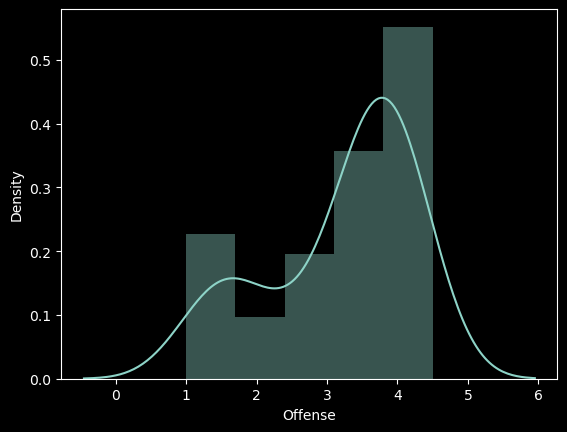

In [18]:
# Offense : 공격력
sns.distplot(df['Offense']);    # 분포 확인 distplot

In [19]:
df[df['Offense'] == df['Offense'].max()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
1,Scizor,Test your mettle with this Melee All-Rounder c...,All-Rounder,Melee,Intermediate,4.5,2.5,4.5,2.5,1.0
26,Venusaur,"If its moves land successfully, Venusaur can d...",Attacker,Ranged,Intermediate,4.5,2.0,2.0,2.5,1.0
34,Pikachu,Pikachu is a Pokémon that excels at attacking ...,Attacker,Ranged,Novice,4.5,1.5,2.5,2.0,1.5
36,Gardevoir,Gardevoir strikes its opponents from far away ...,Attacker,Ranged,Intermediate,4.5,1.5,1.5,3.0,1.5


In [20]:
df[df['Offense'] == df['Offense'].min()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
20,Wigglytuff,Wigglytuff learns lots of moves that can stop ...,Supporter,Ranged,Intermediate,1.0,2.5,2.5,2.0,4.5
37,Blissey,Blissey is a Pokémon that excels at supporting...,Supporter,Melee,Novice,1.0,3.5,1.5,1.5,4.5


<AxesSubplot:xlabel='Endurance', ylabel='Density'>

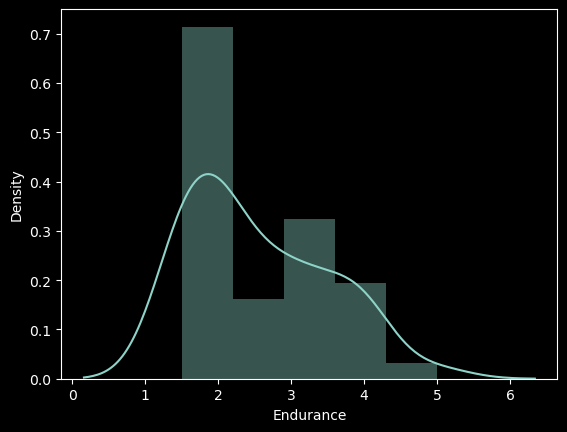

In [21]:
# Endurance : 지구력 (스테이나)
sns.distplot(df['Endurance'])

In [23]:
df[df['Endurance'] == df['Endurance'].max()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
30,Snorlax,Snorlax can take a lot of hits. It’s a dependa...,Defender,Melee,Novice,1.5,5.0,2.0,1.5,2.5


In [24]:
df[df['Endurance'] == df['Endurance'].min()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
0,Zoroark,Confound the competition with Zoroark’s speed ...,Speedster,Melee,Expert,3.5,1.5,4.0,2.0,0.5
5,Delphox,Add a Ranged Attacker to your team with this f...,Attacker,Ranged,Novice,4.0,1.5,3.0,2.5,0.5
16,Alolan Ninetales,Alolan Ninetales uses moves that freeze its op...,Attacker,Ranged,Intermediate,4.0,1.5,1.5,2.5,3.0
17,Cinderace,Cinderace doesn’t just have high attack power—...,Attacker,Ranged,Novice,4.0,1.5,3.0,2.5,0.5
28,Talonflame,Talonflame toys with the opposing team by usin...,Speedster,Melee,Novice,2.5,1.5,5.0,3.5,0.5
34,Pikachu,Pikachu is a Pokémon that excels at attacking ...,Attacker,Ranged,Novice,4.5,1.5,2.5,2.0,1.5
35,Zeraora,Zeraora can close the distance between itself ...,Speedster,Melee,Expert,3.5,1.5,4.0,3.0,0.5
36,Gardevoir,Gardevoir strikes its opponents from far away ...,Attacker,Ranged,Intermediate,4.5,1.5,1.5,3.0,1.5
39,Sylveon,Sylveon attacks opponents from a distance whil...,Attacker,Ranged,Intermediate,3.5,1.5,1.5,3.5,3.5
41,Greedent,Stash away or consume Berries strategically to...,Defender,Melee,Expert,4.0,1.5,2.0,1.0,1.0


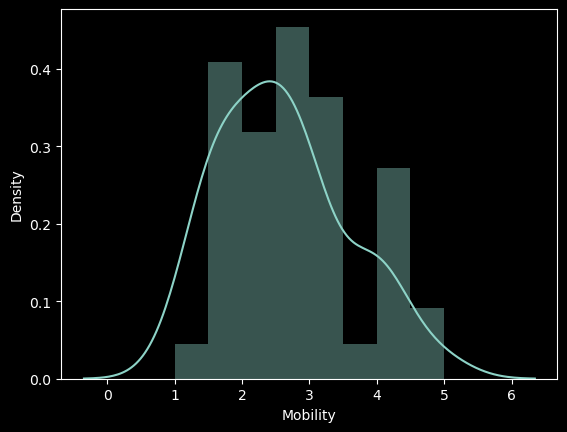

In [25]:
# Mobility : 기동성
sns.distplot(df['Mobility']);

In [26]:
df[df['Mobility'] == df['Mobility'].max()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
28,Talonflame,Talonflame toys with the opposing team by usin...,Speedster,Melee,Novice,2.5,1.5,5.0,3.5,0.5


In [27]:
df[df['Mobility'] == df['Mobility'].min()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
25,Mr. Mime,Mr. Mime specializes in hindering opposing Pok...,Supporter,Melee,Intermediate,1.5,4.0,1.0,1.5,4.0


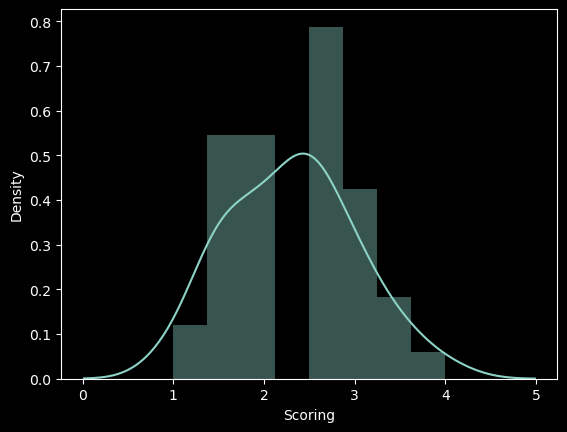

In [28]:
# Scoring : 득점력
sns.distplot(df['Scoring']);

In [29]:
df[df['Scoring'] == df['Scoring'].max()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
4,Dodrio,Prove that three heads are better than one wit...,Speedster,Melee,Expert,3.0,2.0,4.0,4.0,0.5


In [30]:
df[df['Scoring'] == df['Scoring'].min()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
2,Glaceon,Take the Glacial Stage with this sleet-footed ...,Attacker,Ranged,Intermediate,4.0,2.0,3.0,1.0,0.5
41,Greedent,Stash away or consume Berries strategically to...,Defender,Melee,Expert,4.0,1.5,2.0,1.0,1.0


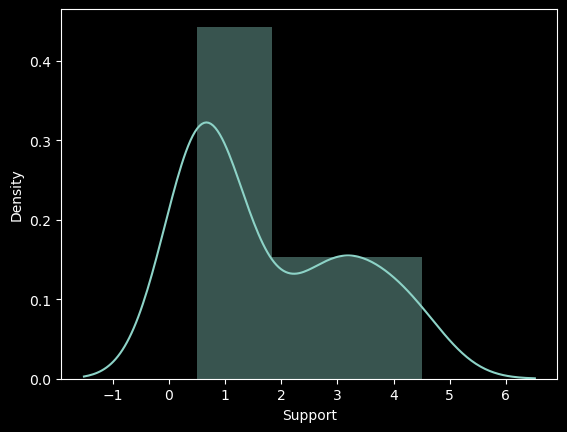

In [31]:
# Support : 지원 등급
sns.distplot(df['Support']);

In [32]:
df[df['Support'] == df['Support'].max()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
6,Clefable,Channel cosmic power and eclipse the competiti...,Supporter,Melee,Novice,2.0,3.0,1.5,1.5,4.5
20,Wigglytuff,Wigglytuff learns lots of moves that can stop ...,Supporter,Ranged,Intermediate,1.0,2.5,2.5,2.0,4.5
37,Blissey,Blissey is a Pokémon that excels at supporting...,Supporter,Melee,Novice,1.0,3.5,1.5,1.5,4.5


In [33]:
df[df['Support'] == df['Support'].min()]

,Name,Description,Role,Ranged_or_Melee,UsageDifficulty,Offense,Endurance,Mobility,Scoring,Support
0,Zoroark,Confound the competition with Zoroark’s speed ...,Speedster,Melee,Expert,3.5,1.5,4.0,2.0,0.5
2,Glaceon,Take the Glacial Stage with this sleet-footed ...,Attacker,Ranged,Intermediate,4.0,2.0,3.0,1.0,0.5
4,Dodrio,Prove that three heads are better than one wit...,Speedster,Melee,Expert,3.0,2.0,4.0,4.0,0.5
5,Delphox,Add a Ranged Attacker to your team with this f...,Attacker,Ranged,Novice,4.0,1.5,3.0,2.5,0.5
11,Duraludon,Add a Ranged Attacker to your UNITE team with ...,Attacker,Ranged,Intermediate,3.5,3.5,2.5,2.5,0.5
12,Azumarill,Add a Melee All-Rounder to your team with a wh...,All-Rounder,Melee,Novice,3.0,3.0,2.5,2.5,0.5
13,Tsareena,"Tsareena is ready to glide, kick, and stomp it...",All-Rounder,Melee,Expert,3.5,3.0,3.0,1.5,0.5
14,Dragonite,Dragonite is ready to rampage through the comp...,All-Rounder,Melee,Novice,4.0,2.5,2.5,3.0,0.5
17,Cinderace,Cinderace doesn’t just have high attack power—...,Attacker,Ranged,Novice,4.0,1.5,3.0,2.5,0.5
18,Garchomp,"Garchomp’s Ability, Rough Skin, means it can s...",All-Rounder,Melee,Intermediate,3.5,3.5,2.5,2.5,0.5


Role에 대한 스테이터스 분포 확인

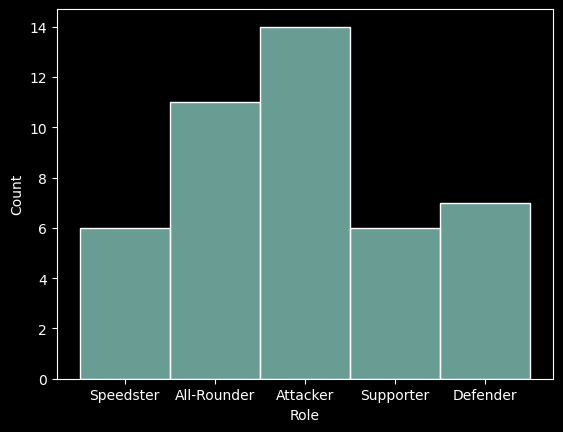

In [34]:
sns.histplot(data=df['Role'], kde=False);

In [35]:
df['Role'].value_counts()

Attacker       14
All-Rounder    11
Defender        7
Speedster       6
Supporter       6
Name: Role, dtype: int64

6


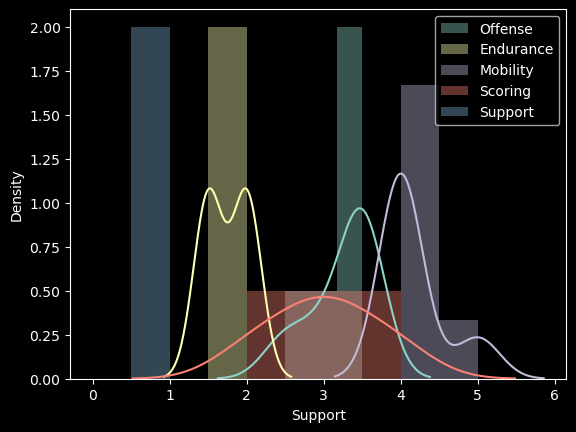

In [36]:
plt.style.use(['dark_background'])

df_speed = df[df['Role'] == 'Speedster']
print(len(df_speed))

sns.distplot(df_speed['Offense'], label='Offense');
sns.distplot(df_speed['Endurance'], label='Endurance');
sns.distplot(df_speed['Mobility'], label='Mobility');
sns.distplot(df_speed['Scoring'], label='Scoring');
sns.distplot(df_speed['Support'], label = 'Support');
plt.legend();

In [41]:
df1 = pd.DataFrame(df[['Offense', 'Endurance', 'Mobility', 'Scoring','Support']].mean(), columns=['Total'])
df2 = pd.DataFrame(df_speed[['Offense', 'Endurance', 'Mobility', 'Scoring','Support']].mean(), columns=['speed'])
df3 = pd.concat([df1,df2], axis=1)
df3['gap'] = df3['Total'] - df3['speed']
df3

,Total,speed,gap
Offense,3.204545,3.250000,-0.045455
Endurance,2.545455,1.750000,0.795455
Mobility,2.602273,4.166667,-1.564394
Scoring,2.306818,3.000000,-0.693182
Support,1.784091,0.500000,1.284091


In [38]:
df_speed[['Offense', 'Endurance','Mobility','Scoring','Support']].mean()

Offense      3.250000
Endurance    1.750000
Mobility     4.166667
Scoring      3.000000
Support      0.500000
dtype: float64